In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from matplotlib import pyplot as plt

In [2]:
gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
img_folder = r'E:\Sem-6\Digit_Recognition_Project\HG Combined'
data = tf.keras.utils.image_dataset_from_directory(img_folder, image_size=(32, 32), label_mode='categorical')
data

Found 40448 files belonging to 20 classes.


<BatchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None))>

In [4]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
len(batch)

2

c:\Python310\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


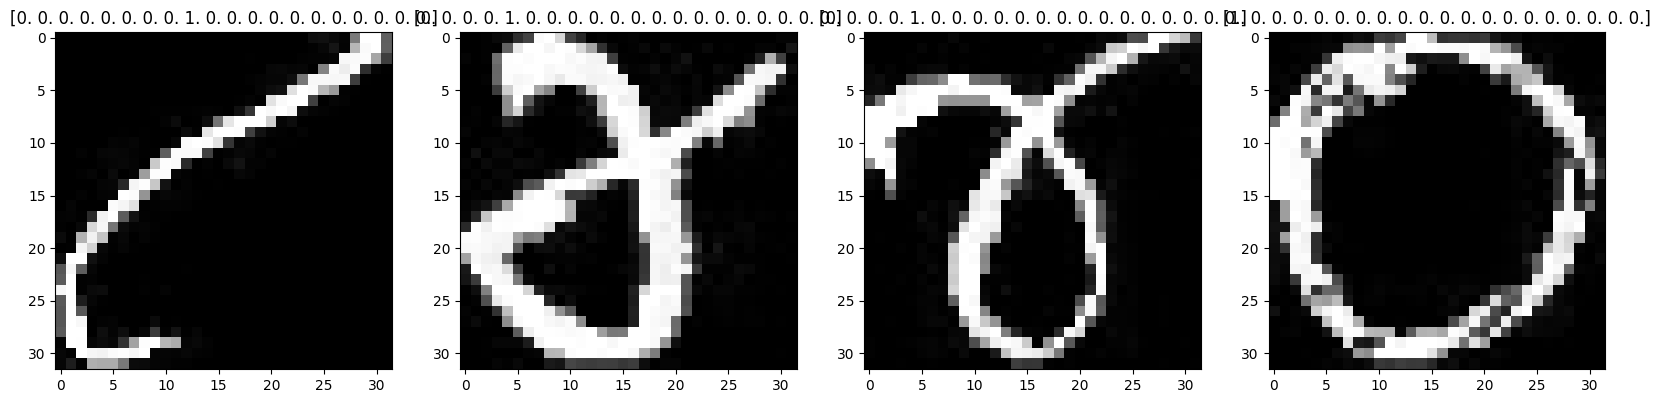

In [5]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [6]:
data = data.map(lambda x,y: (x/255, y))

batch = data.as_numpy_iterator().next()

train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [7]:
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten,Input,AveragePooling2D
from keras.callbacks import ReduceLROnPlateau
from keras import Sequential


In [8]:
num_classes = 20

input1 = Input(shape=(32, 32, 3))



In [9]:
model = Sequential()
model.add(Conv2D(filters=6, kernel_size=(5,5),activation='tanh', input_shape=(32, 32, 3)))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=16, kernel_size=(5,5), activation='tanh'))
model.add(AveragePooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=120, kernel_size=(5,5), activation='tanh'))
model.add(Flatten())
model.add(Dense(84, activation='tanh'))
model.add(Dense(20, activation='softmax'))

In [11]:
model.summary()
reduceLROnPlateau = ReduceLROnPlateau(monitor='val_accuracy', 
                                patience=3,
                                verbose=1, 
                                factor=0.5,
                                min_lr=0.00001)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(train, epochs=5, validation_data=val, callbacks=[reduceLROnPlateau])

Epoch 1/5
884/884 [==============================] - 100s 112ms/step - loss: 0.6153 - accuracy: 0.8119 - val_loss: 0.3226 - val_accuracy: 0.8926 - lr: 0.0010
Epoch 2/5
884/884 [==============================] - 48s 55ms/step - loss: 0.2513 - accuracy: 0.9172 - val_loss: 0.2420 - val_accuracy: 0.9118 - lr: 0.0010
Epoch 3/5
884/884 [==============================] - 47s 52ms/step - loss: 0.1837 - accuracy: 0.9369 - val_loss: 0.2018 - val_accuracy: 0.9315 - lr: 0.0010
Epoch 4/5
884/884 [==============================] - 46s 52ms/step - loss: 0.1370 - accuracy: 0.9545 - val_loss: 0.1496 - val_accuracy: 0.9503 - lr: 0.0010
Epoch 5/5
884/884 [==============================] - 44s 50ms/step - loss: 0.1029 - accuracy: 0.9667 - val_loss: 0.1347 - val_accuracy: 0.9565 - lr: 0.0010


In [13]:
model.predict(test)

#model.save('Hindi_Gujrati_Lenet_Model.h5')

126/126 [==============================] - 21s 58ms/step


array([[4.9772702e-08, 4.3835089e-06, 1.2059730e-06, ..., 6.6749845e-07,
        2.2737025e-08, 1.2777473e-06],
       [1.9939296e-05, 1.6234249e-05, 2.2635904e-06, ..., 3.9054640e-08,
        4.4656108e-08, 1.8623782e-06],
       [9.3467534e-06, 7.0435078e-08, 3.0789553e-05, ..., 9.9983597e-01,
        3.3817105e-06, 9.3403378e-06],
       ...,
       [2.1488766e-05, 8.2100232e-06, 6.2281970e-06, ..., 1.4287892e-06,
        2.8202359e-05, 4.0808655e-07],
       [4.3362700e-08, 5.3424162e-07, 5.8972937e-06, ..., 1.0920164e-05,
        4.2171362e-07, 9.9987078e-01],
       [7.9190802e-05, 2.2171432e-06, 8.2896404e-05, ..., 3.4432014e-07,
        6.7229769e-07, 2.6666798e-05]], dtype=float32)